In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [99]:
display(stud.head(10))
stud.info() 
# загрузили и посмотрели, какие данные есть. 395 строчек, много случайных пропусков

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [100]:
stud.isna().sum() #посчитаем сколько пропусков в каких столбцах

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [102]:
# выкинем строчки с пропусками в целевой переменной
stud = stud.dropna(subset=['score'], axis = 0)
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

In [103]:
# начнем со столбца school

print(stud.school.nunique())
print(stud.school.value_counts())

2
GP    344
MS     45
Name: school, dtype: int64


<AxesSubplot:xlabel='school', ylabel='score'>

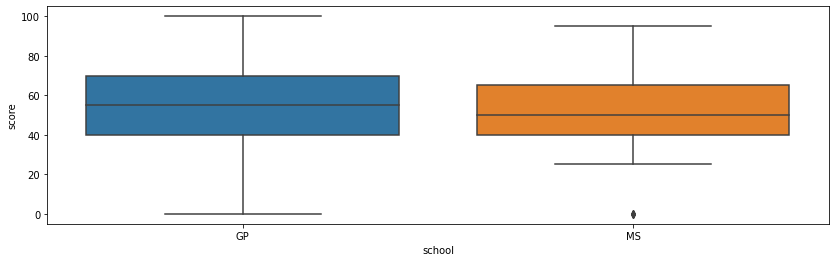

In [8]:
fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x='school', y='score', data=stud,ax=ax)

In [9]:
#похоже, во второй школе больше середнячков и нет явных отстающих. Оставляем столбец

2
F    204
M    185
Name: sex, dtype: int64


<AxesSubplot:xlabel='sex', ylabel='score'>

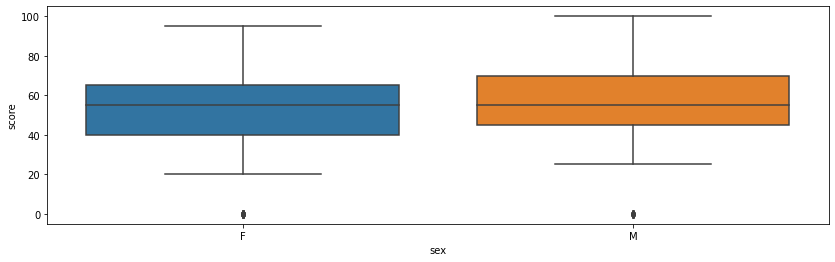

In [104]:
# следующий номинативный столбец sex
print(stud.sex.nunique())
print(stud.sex.value_counts())
fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x='sex', y='score', data=stud, ax=ax)

In [12]:
# явно видно, что пол не сильно, но влияет на оценки. Оставляем.

2
U    291
R     83
Name: address, dtype: int64


<AxesSubplot:xlabel='address', ylabel='score'>

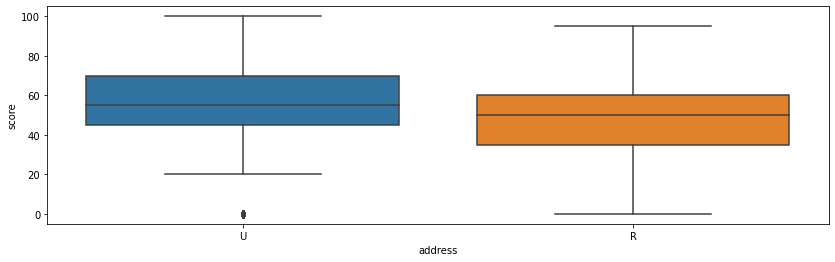

In [105]:
# следующий номинативный столбец address
print(stud.address.nunique())
print(stud.address.value_counts())
fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x='address', y='score', data=stud, ax=ax)

In [14]:
# четкая зависмость - дети из городскорй среды получают выше score. Оставляем. в столбце address - 15 пропусков. 

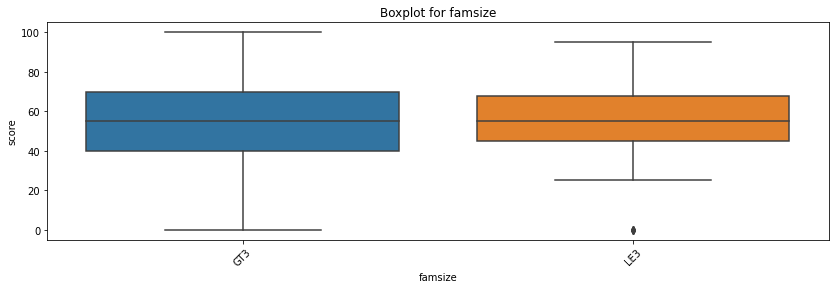

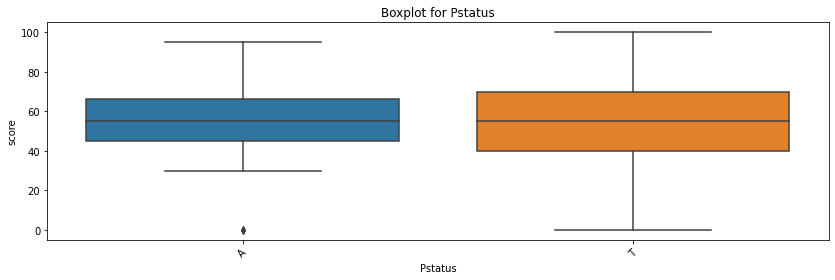

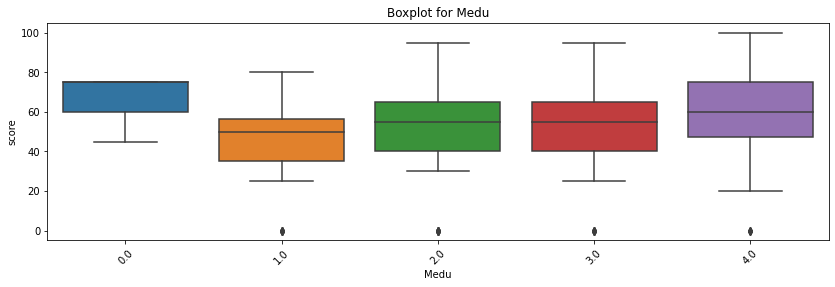

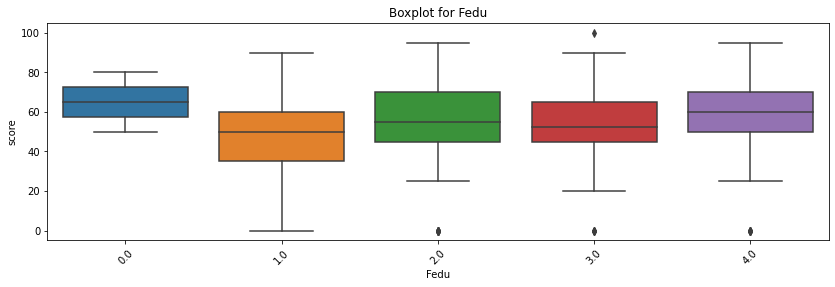

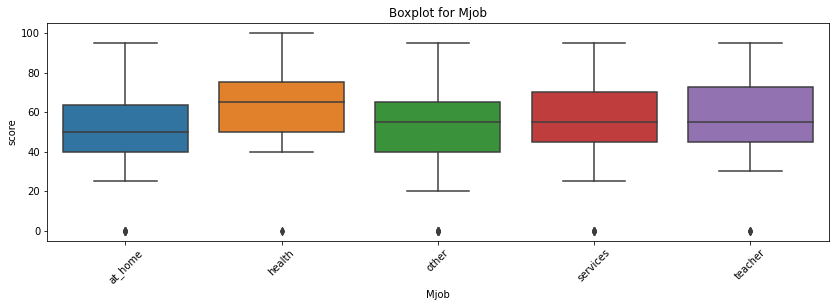

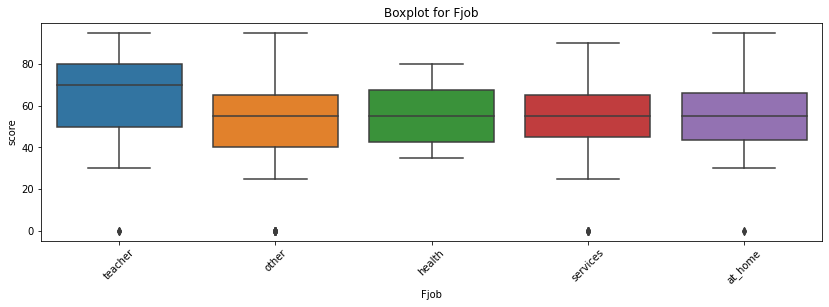

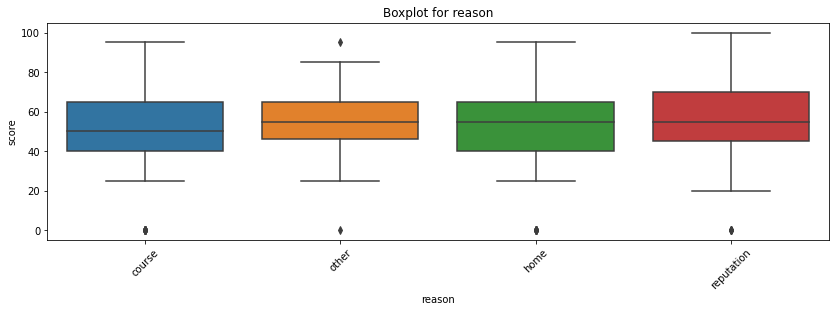

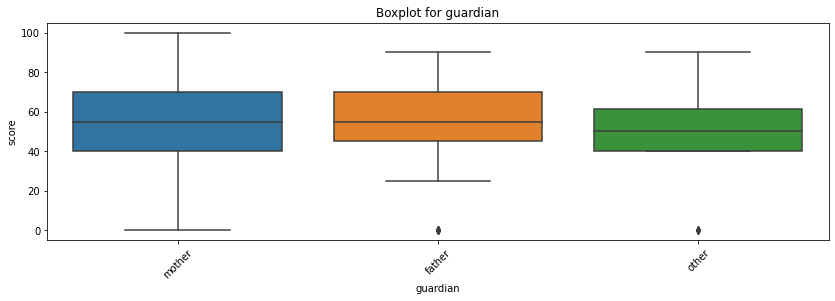

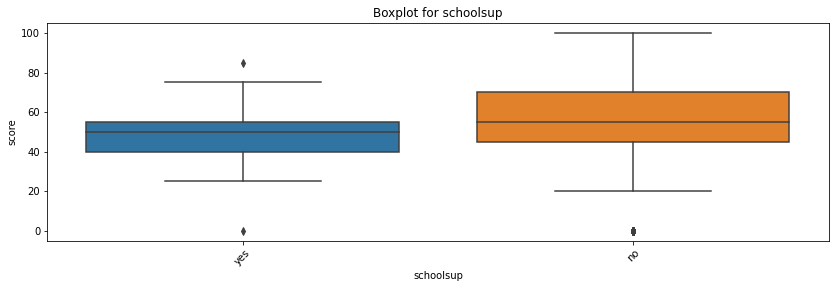

In [44]:
# для ускорения процесса построим boxplot's для сразу группы номинативных параметров
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud, #.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup']:
    get_boxplot(col)

<AxesSubplot:>

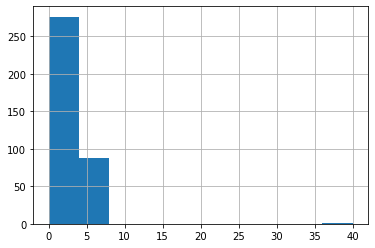

In [32]:
stud.Fedu.hist()

In [41]:
stud.loc[stud.Fedu == 40, 'Fedu'] = 4.0

In [26]:
# явная ошибка - похоже, должно быть 4.0. Поправим на 4.0

<AxesSubplot:>

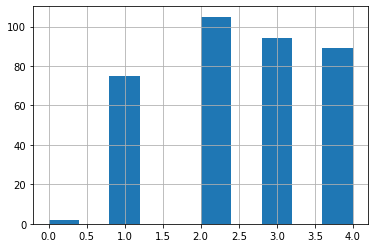

In [43]:
stud.Fedu.hist()

In [40]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

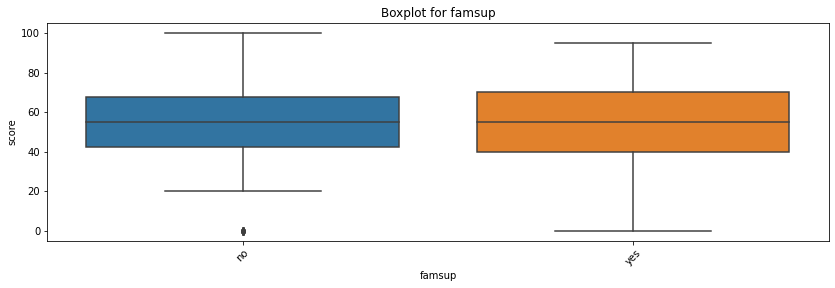

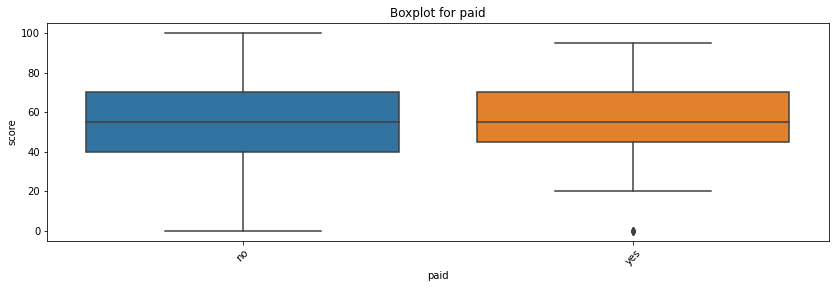

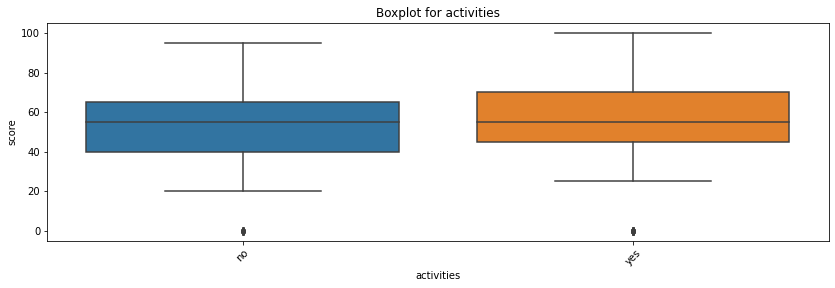

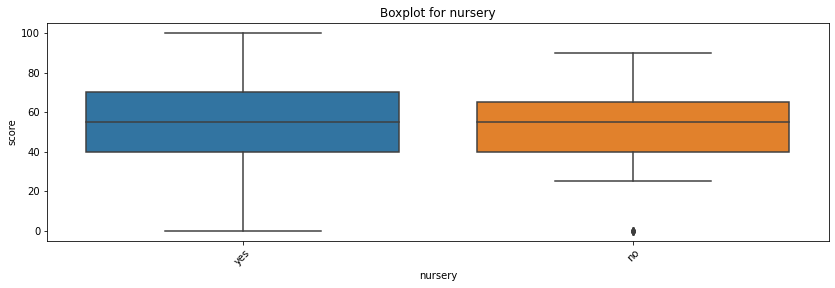

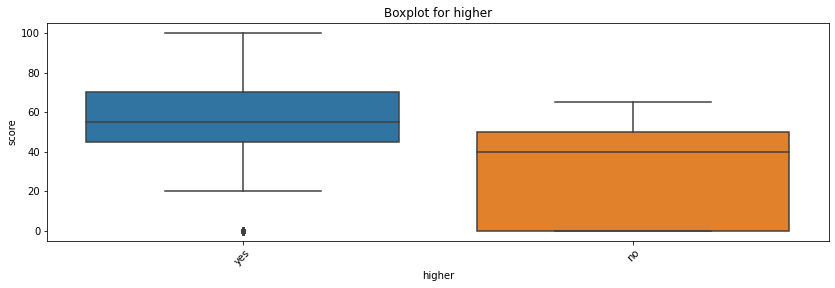

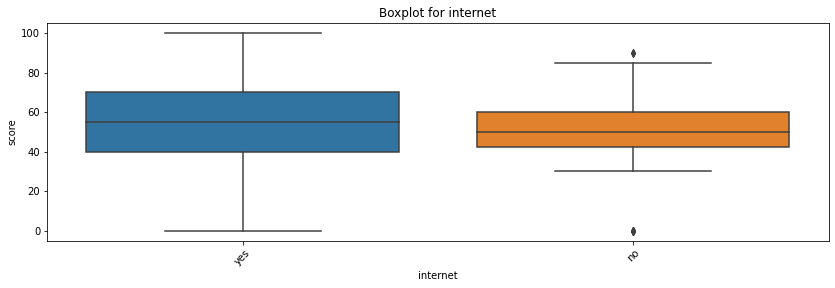

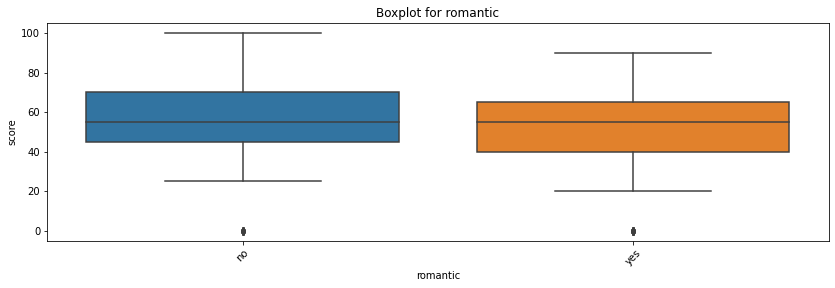

In [45]:
# для оставшихся номинативных параметров 
for col in ['famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

<AxesSubplot:>

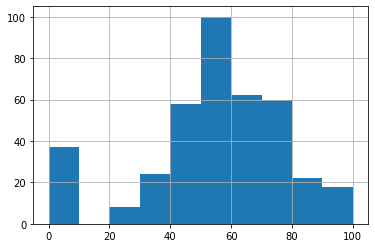

In [58]:
#посмотрим на распределение цлевого параметра
stud.score.hist()

In [49]:
# 37 учеников получили 0. 
stud.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

<AxesSubplot:>

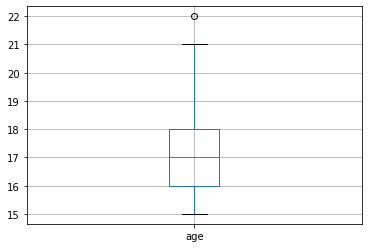

In [50]:
# начнем анализ числовых столбцов
stud.boxplot(column='age')

In [51]:
# явный выброс в 22 года. Пока оставим. Может второгодники.

<AxesSubplot:>

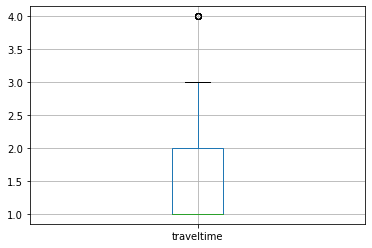

In [52]:
stud.boxplot(column='traveltime')

In [53]:
# Тоже выброс в 4.0 балла. Посмотрим сколько таких

In [56]:
stud.traveltime.value_counts()

1.0    239
2.0     94
3.0     21
4.0      7
Name: traveltime, dtype: int64

In [55]:
#7 учеников живут далеко. Оставляем.

<AxesSubplot:>

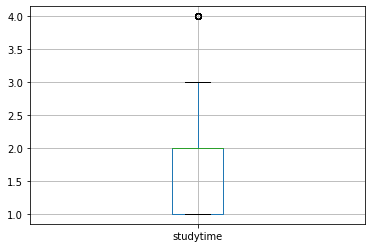

In [57]:
stud.boxplot(column='studytime')

In [59]:
stud.studytime.value_counts()

2.0    189
1.0    103
3.0     63
4.0     27
Name: studytime, dtype: int64

In [60]:
# 27 учеников тратят на учёбу помимо школы в неделю более 10 часов. 

 4.0    178
 5.0     97
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

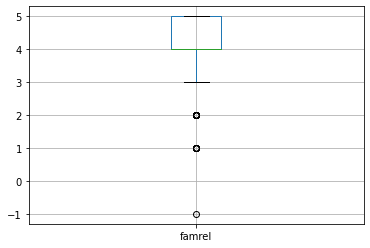

In [61]:
stud.boxplot(column='famrel')
stud.famrel.value_counts()

In [62]:
# явный выброс -1.0 Поправим на 1.0 
stud.loc[stud.famrel == -1.0, 'famrel'] = 1.0

4.0    178
5.0     97
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

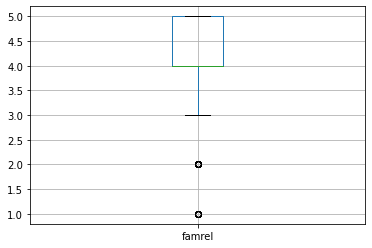

In [63]:
stud.boxplot(column='famrel')
stud.famrel.value_counts()

In [64]:
# с плохими отношениями в семье тоже много учеников. Оставляем данные

3.0    152
4.0    110
2.0     63
5.0     37
1.0     18
Name: freetime, dtype: int64

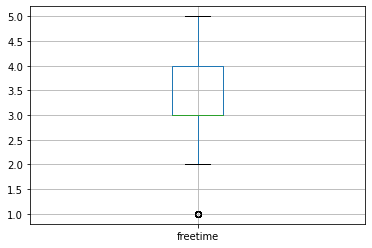

In [65]:
stud.boxplot(column='freetime')
stud.freetime.value_counts()

In [66]:
# 18 учеников имеют очень мало свободно времени после школы. Оставляем

3.0    126
2.0    101
4.0     81
5.0     51
1.0     23
Name: goout, dtype: int64

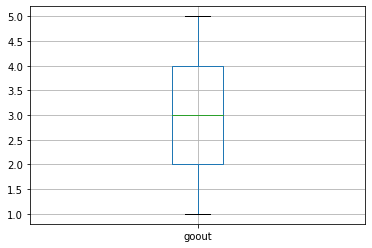

In [67]:
stud.boxplot(column='goout')
stud.goout.value_counts()

In [68]:
# данные о свободном времени с друзьями без выбросов

5.0    137
3.0     88
4.0     60
1.0     47
2.0     42
Name: health, dtype: int64

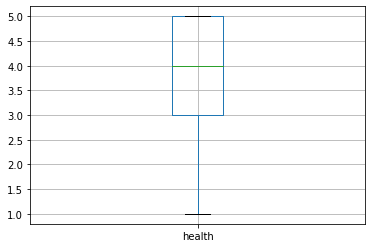

In [69]:
stud.boxplot(column='health')
stud.health.value_counts()

In [70]:
# данные о здоровье. Плсмотрим потом на корреляции.

0.0    290
1.0     48
2.0     15
3.0     14
Name: failures, dtype: int64

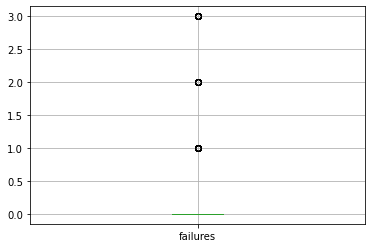

In [71]:
stud.boxplot(column='failures')
stud.failures.value_counts()


In [72]:
# косяки. основная масса без, есть 29 много и очень много. Оставим пока

0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
3.0        7
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

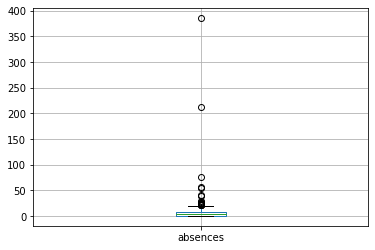

In [73]:
stud.boxplot(column='absences')
stud.absences.value_counts()

<AxesSubplot:>

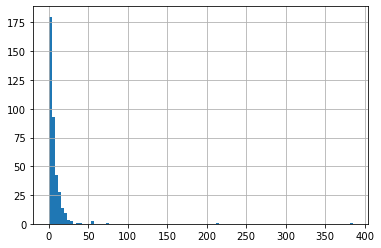

In [85]:
# Упс

stud.absences.hist(bins=100)

<AxesSubplot:title={'center':'Score Vs Пропущенные часы'}, xlabel='absences', ylabel='score'>

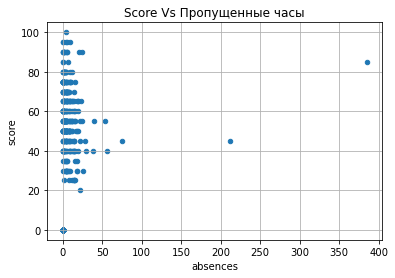

In [75]:
stud.plot(x = 'absences', 
        y = 'score', 
        kind = 'scatter', 
        grid = True, 
        title = 'Score Vs Пропущенные часы')

In [76]:
# Понятней не стало

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].
<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               361 non-null    object 
 1   sex                  361 non-null    object 
 2   age                  361 non-null    int64  
 3   address              347 non-null    object 
 4   famsize              339 non-null    object 
 5   Pstatus              323 non-null    object 
 6   Medu                 358 non-null    float64
 7   Fedu                 338 non-null    float64
 8   Mjob                 345 non-null    object 
 9   Fjob                 327 non-null    object 
 10  reason               344 non-null    object 
 11  guardian             331 non-null    object 
 12  traveltime           333 non-null    float64
 13  studytime            356 non-null    float64
 14  fa

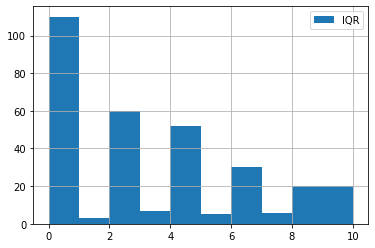

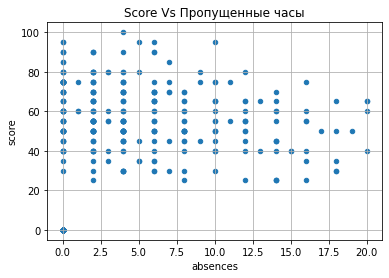

In [80]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();
stud_temp  = stud.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
stud_temp.plot(x = 'absences', 
        y = 'score', 
        kind = 'scatter', 
        grid = True, 
        title = 'Score Vs Пропущенные часы')
stud_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               376 non-null    object 
 1   sex                  376 non-null    object 
 2   age                  376 non-null    int64  
 3   address              362 non-null    object 
 4   famsize              352 non-null    object 
 5   Pstatus              333 non-null    object 
 6   Medu                 373 non-null    float64
 7   Fedu                 352 non-null    float64
 8   Mjob                 358 non-null    object 
 9   Fjob                 341 non-null    object 
 10  reason               359 non-null    object 
 11  guardian             346 non-null    object 
 12  traveltime           348 non-null    float64
 13  studytime            371 non-null    float64
 14  failures             354 non-null    float64
 15  schoolsup            367 non-null    obj

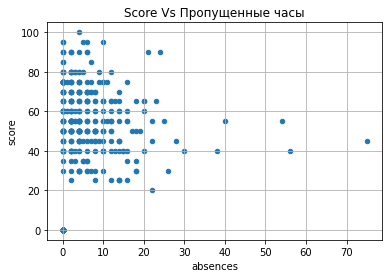

In [86]:
#выкинем выбросы с более чем 100 пропущенными часами 
stud_temp  = stud.loc[stud.absences < 100]
stud_temp.plot(x = 'absences', 
        y = 'score', 
        kind = 'scatter', 
        grid = True, 
        title = 'Score Vs Пропущенные часы')
stud_temp.info()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.146736,-0.152148,0.073146,-0.018227,0.205919,0.018227,0.058768,0.016099,0.121115,-0.068103,0.096628,-0.155726
Medu,-0.146736,1.000000,0.621981,-0.165838,0.081032,-0.240319,-0.081032,-0.003697,0.038265,0.072320,-0.048331,-0.014047,0.213349
Fedu,-0.152148,0.621981,1.000000,-0.132036,0.017306,-0.273286,-0.017306,-0.016791,-0.017263,0.050997,0.018624,0.020970,0.130923
traveltime,0.073146,-0.165838,-0.132036,1.000000,-0.105910,0.049738,0.105910,-0.032413,-0.026299,0.032629,-0.011724,-0.048242,-0.070559
studytime,-0.018227,0.081032,0.017306,-0.105910,1.000000,-0.181947,-1.000000,0.039899,-0.125066,-0.053831,-0.079180,-0.025707,0.115741
failures,0.205919,-0.240319,-0.273286,0.049738,-0.181947,1.000000,0.181947,-0.021068,0.091608,0.107747,0.088013,0.058166,-0.344338
"studytime, granular",0.018227,-0.081032,-0.017306,0.105910,-1.000000,0.181947,1.000000,-0.039899,0.125066,0.053831,0.079180,0.025707,-0.115741
famrel,0.058768,-0.003697,-0.016791,-0.032413,0.039899,-0.021068,-0.039899,1.000000,0.171165,0.072291,0.089074,-0.082959,0.055305
freetime,0.016099,0.038265,-0.017263,-0.026299,-0.125066,0.091608,0.125066,0.171165,1.000000,0.296338,0.064315,0.010745,0.019026
goout,0.121115,0.072320,0.050997,0.032629,-0.053831,0.107747,0.053831,0.072291,0.296338,1.000000,-0.018026,-0.047954,-0.129685


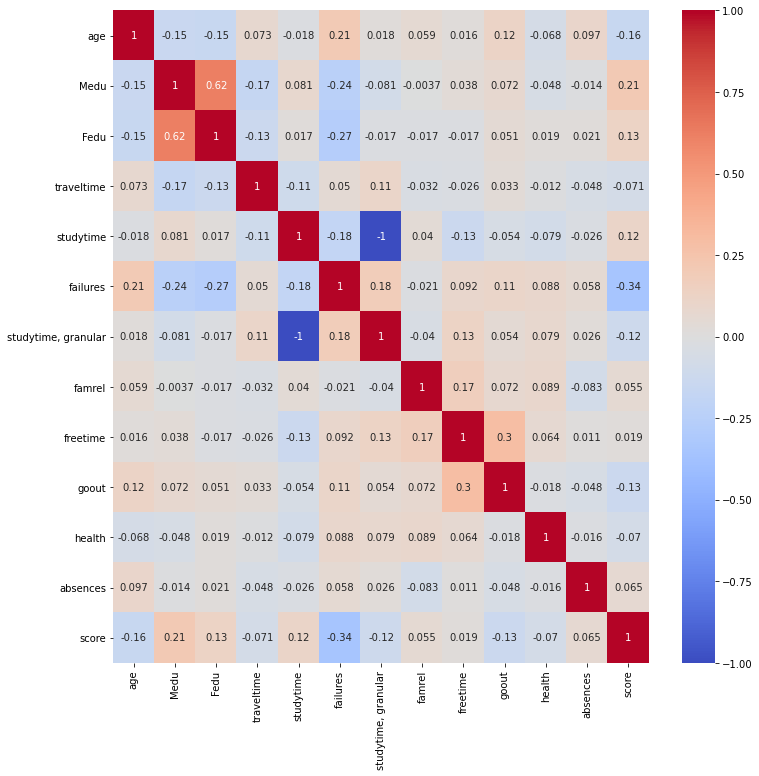

In [88]:
plt.gcf().set_size_inches(12, 12)
correlation = stud.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
display(correlation)

In [94]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))

    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in ['sex', 'famsize', 'Pstatus', 'Mjob', 'Medu', 'Fedu', 'Fjob', 'absences', 'reason', ]:
    get_stat_dif(col)



Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки absences


In [97]:
# выкинем studytime, granular так он полностью аналогичен studytime c обратным знаком
stud.drop(['studytime, granular'], inplace = True, axis = 1)
stud_temp.info()
stud.head(10)

KeyError: "['studytime, granular'] not found in axis"

In [108]:
stud3 = stud.where(pd.notnull(stud), 'unknown')

In [110]:
stud3.info()
stud3.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   school               389 non-null    object
 1   sex                  389 non-null    object
 2   age                  389 non-null    int64 
 3   address              389 non-null    object
 4   famsize              389 non-null    object
 5   Pstatus              389 non-null    object
 6   Medu                 389 non-null    object
 7   Fedu                 389 non-null    object
 8   Mjob                 389 non-null    object
 9   Fjob                 389 non-null    object
 10  reason               389 non-null    object
 11  guardian             389 non-null    object
 12  traveltime           389 non-null    object
 13  studytime            389 non-null    object
 14  failures             389 non-null    object
 15  schoolsup            389 non-null    object
 16  famsup  

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,unknown,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,-6,yes,unknown,no,4,3,4,3,6,30
1,GP,F,17,U,GT3,unknown,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,-6,yes,yes,no,5,3,3,3,4,30
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,unknown,no,yes,-6,yes,yes,unknown,4,3,2,3,10,50
3,GP,F,15,U,GT3,T,4,2,health,unknown,home,mother,1,3,0,no,yes,yes,yes,yes,-9,yes,yes,yes,3,2,2,5,2,75
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,-6,yes,no,no,4,3,2,5,4,50
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,-6,yes,yes,no,5,4,2,5,10,75
6,GP,M,16,unknown,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,-6,yes,yes,no,4,4,4,3,0,55
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,-6,yes,no,no,4,1,4,1,6,30
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,-6,yes,yes,no,unknown,2,2,1,0,95
9,GP,M,15,U,unknown,unknown,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,-6,yes,yes,no,5,5,1,5,0,75


3
U          291
R           83
unknown     15
Name: address, dtype: int64


<AxesSubplot:xlabel='address', ylabel='score'>

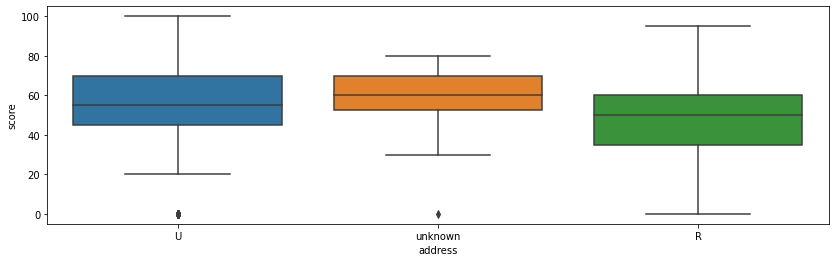

In [111]:
print(stud3.address.nunique())
print(stud3.address.value_counts())
fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x='address', y='score', data=stud3, ax=ax)

KeyError: "None of [Index(['health'], dtype='object')] are in the [columns]"

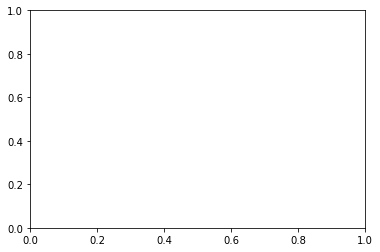

In [113]:
stud3.boxplot(column='health')
stud3.health.value_counts()

<AxesSubplot:xlabel='health', ylabel='score'>

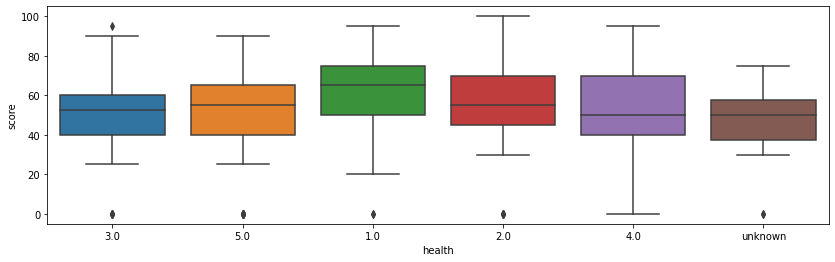

In [114]:
fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x='health', y='score', data=stud3, ax=ax)

3.0    126
2.0    101
4.0     81
5.0     51
1.0     23
Name: goout, dtype: int64

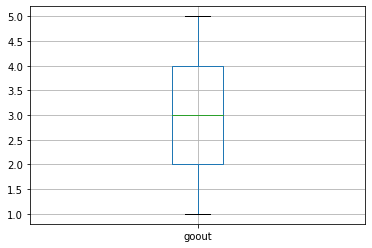

In [116]:
stud.boxplot(column='goout')
stud.goout.value_counts()

In [123]:
stud4=stud
stud4["address"] = stud4["address"].where(pd.notnull(stud4["address"]), 'unknown')
stud4.head(10)
stud4.info()
stud4.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              389 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

school                  0
sex                     0
age                     0
address                 0
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 38
paid                   39
activities             14
nursery                15
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime                9
goout                   7
health                 15
absences               11
score                   0
dtype: int64

In [124]:
stud5=stud
stud5 = stud5.where(pd.notnull(stud5), 'unknown')
stud5.head(10)
stud5.info()
stud5.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   school               389 non-null    object
 1   sex                  389 non-null    object
 2   age                  389 non-null    int64 
 3   address              389 non-null    object
 4   famsize              389 non-null    object
 5   Pstatus              389 non-null    object
 6   Medu                 389 non-null    object
 7   Fedu                 389 non-null    object
 8   Mjob                 389 non-null    object
 9   Fjob                 389 non-null    object
 10  reason               389 non-null    object
 11  guardian             389 non-null    object
 12  traveltime           389 non-null    object
 13  studytime            389 non-null    object
 14  failures             389 non-null    object
 15  schoolsup            389 non-null    object
 16  famsup  

school                 0
sex                    0
age                    0
address                0
famsize                0
Pstatus                0
Medu                   0
Fedu                   0
Mjob                   0
Fjob                   0
reason                 0
guardian               0
traveltime             0
studytime              0
failures               0
schoolsup              0
famsup                 0
paid                   0
activities             0
nursery                0
studytime, granular    0
higher                 0
internet               0
romantic               0
famrel                 0
freetime               0
goout                  0
health                 0
absences               0
score                  0
dtype: int64

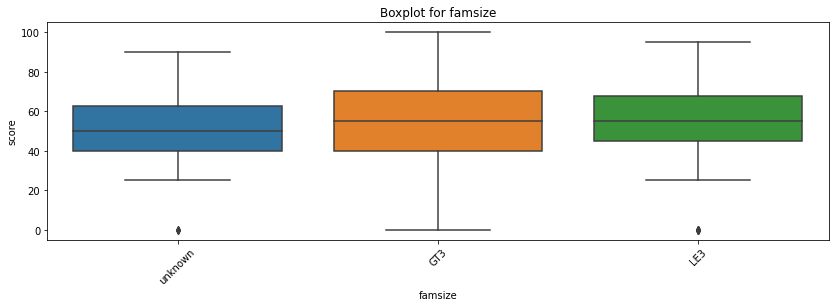

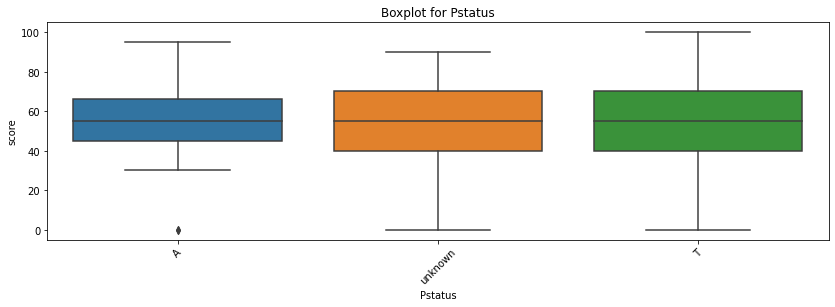

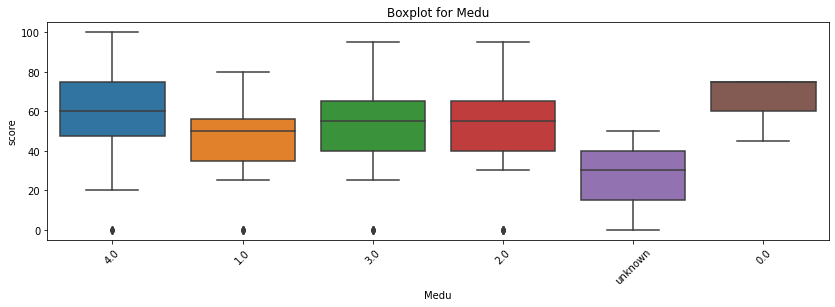

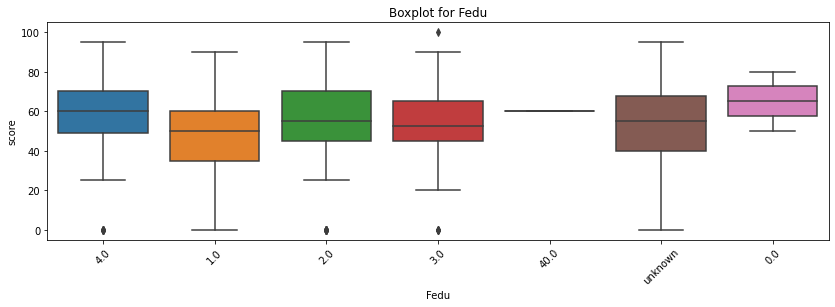

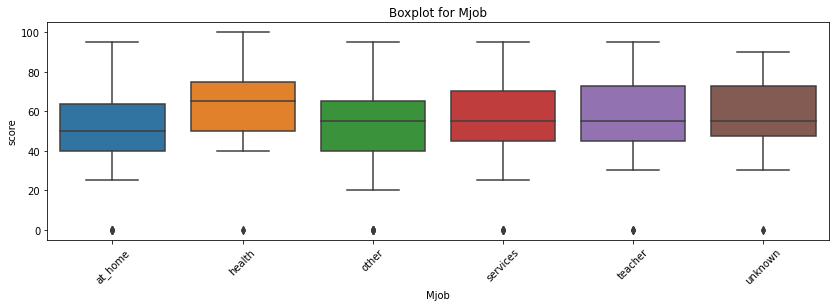

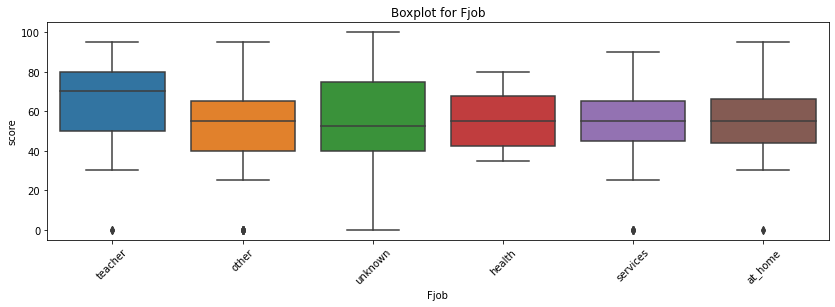

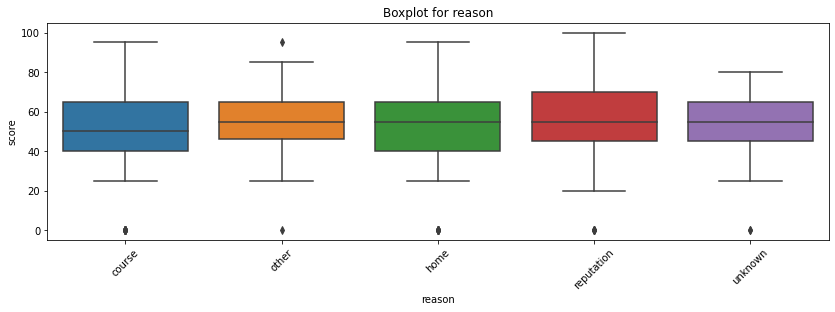

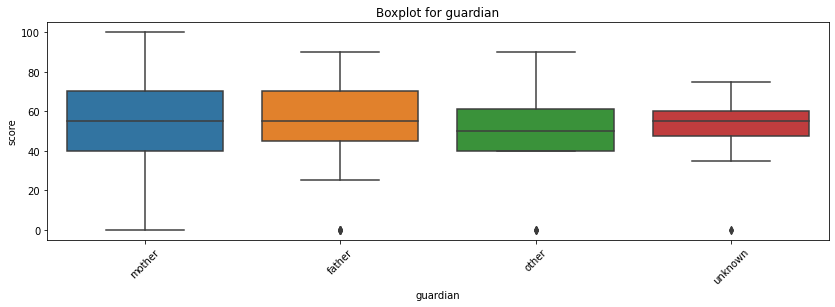

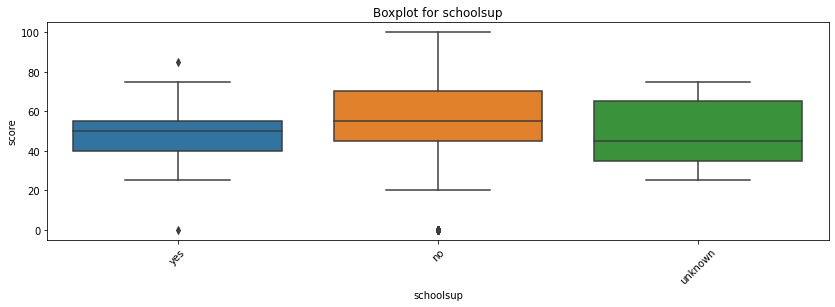

In [125]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud5, #.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup']:
    get_boxplot(col)

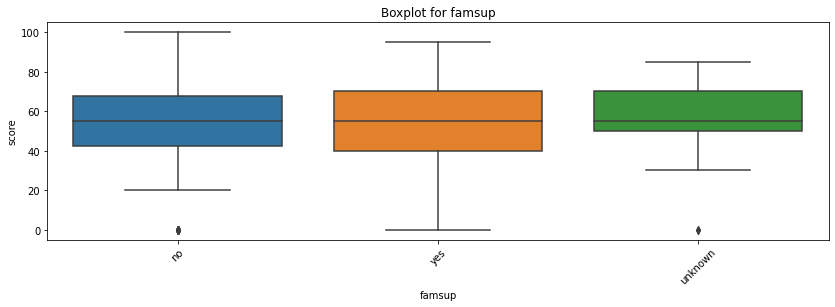

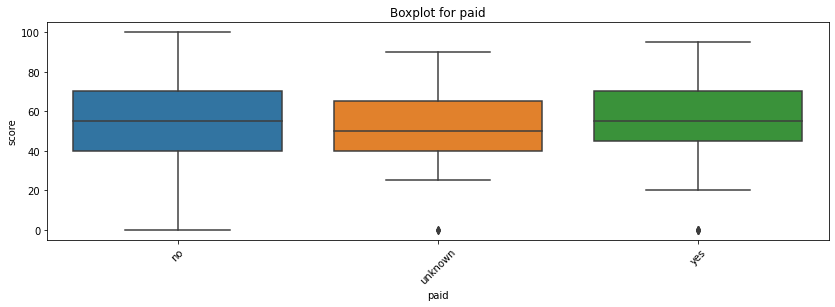

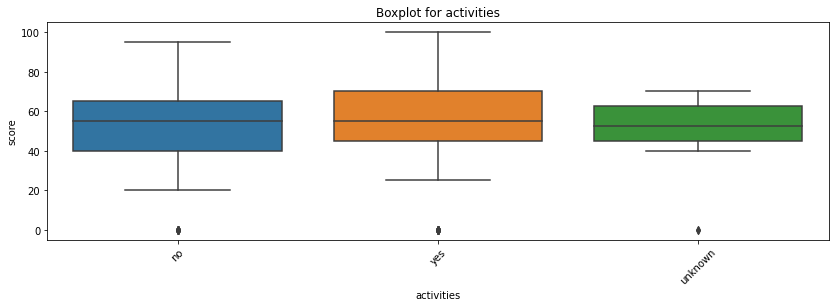

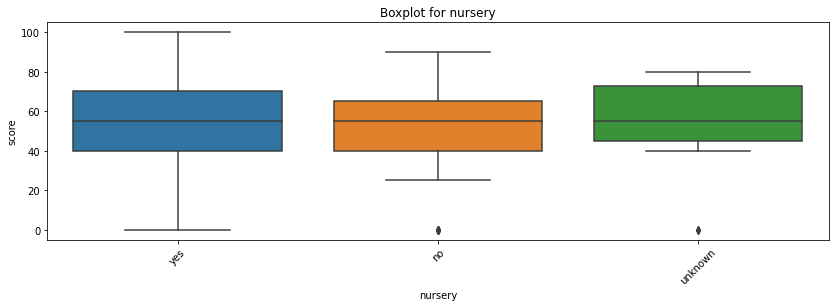

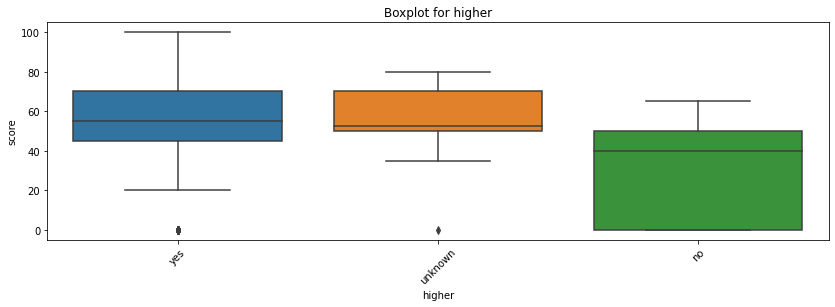

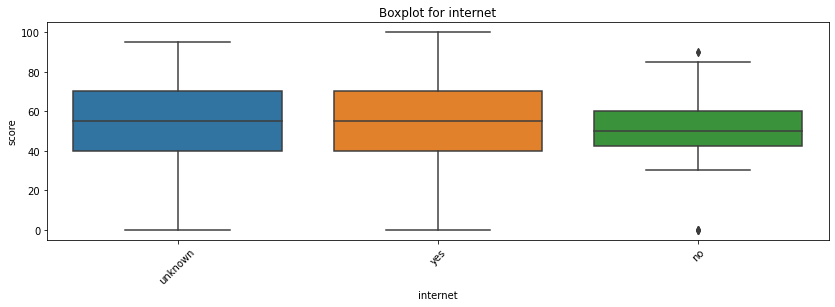

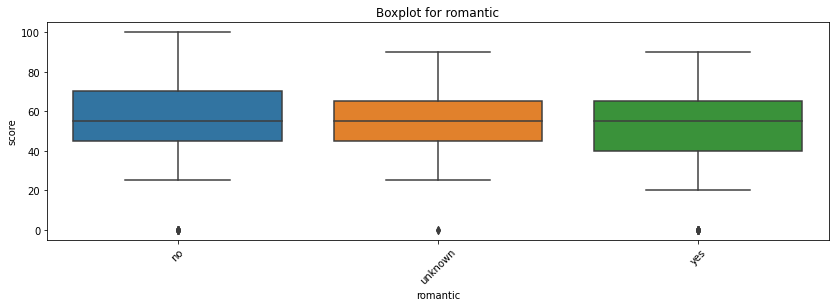

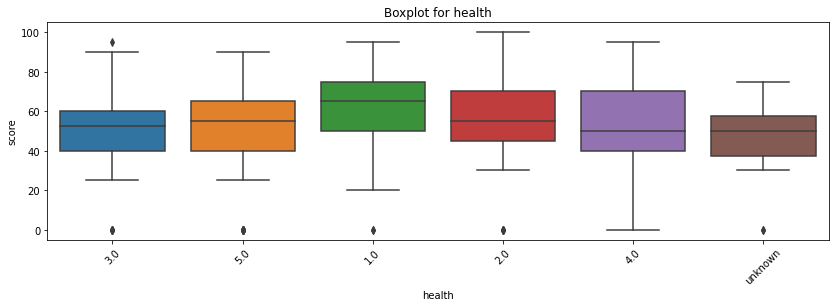

In [131]:
for col in ['famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'health']:
    get_boxplot(col)

In [128]:
def get_stat_dif(column):
    cols = stud5.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))

    for comb in combinations_all:
        if ttest_ind(stud5.loc[stud5.loc[:, column] == comb[0], 'score'], 
                        stud5.loc[stud5.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in ['sex', 'famsize', 'Pstatus', 'Mjob', 'Medu', 'Fedu', 'Fjob', 'absences', 'reason', ]:
    get_stat_dif(col)



Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки absences


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
